In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Input, Bidirectional,SimpleRNN, Embedding, Conv1D, LSTM, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split



from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)


2024-09-16 09:33:32.037954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[nltk_data] Downloading package stopwords t

2.12.0


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
import torch

print(torch.cuda.is_available())

if torch.cuda.is_available():
    print("Cuda is Availabe")
else:
    print("Cuda Can't be found")

True
Cuda is Availabe


In [3]:
#new_df=pd.read_csv('C:/Users/Administrator/OneDrive/Documents/africa/data/socialcons_all_new.csv')
new_df = pd.read_csv('/home/hsibitenda/scratch/harriet/socialcons_clean2_rebel5_new.csv')
# new_df=pd.read_csv('D:/senego/dataafrica/analysis/socialcons_all_new.csv')
# new_df=pd.read_csv("C:/Users/Administrator/Downloads/bert.csv")

In [4]:
new_df.shape

(66862, 20)

In [5]:
# df4=new_df.copy()

In [6]:
# new_df.shape

In [7]:
# !pip install accelerate -U

df=new_df.copy()
df=df.astype(str)

In [8]:
df.shape

(66862, 20)

In [9]:
df.rename(columns={'llama2_labelone10':'cluster','llama2_labelone': 'topic','Predicted_Categories3':'theme','llama3_sentiment':'sentiment', 'Entity_Categories2':'category' },inplace=True)
df.columns

Index(['Unnamed: 0', 'sourcetype', 'Views', 'Date', 'textid', 'alltext',
       'topic', 'cleaned_theme', 'cluster', 'theme', 'sentiment', 'Text_lemma',
       'Entities', 'Relations', 'Entity_Categories', 'Head', 'Relation_Type',
       'Tail', 'Spans', 'category'],
      dtype='object')

In [10]:
df2=df.head(50)
df2.columns

Index(['Unnamed: 0', 'sourcetype', 'Views', 'Date', 'textid', 'alltext',
       'topic', 'cleaned_theme', 'cluster', 'theme', 'sentiment', 'Text_lemma',
       'Entities', 'Relations', 'Entity_Categories', 'Head', 'Relation_Type',
       'Tail', 'Spans', 'category'],
      dtype='object')

In [11]:
import pandas as pd

# Define the possible themes
themes = ['poverty', 'hunger', 'health', 'employment', 'education', 'security', 'others']

# Function to expand the dataframe based on multilabels by duplicating rows
# Function to expand the dataframe based on multilabels by duplicating rows
def expand_multilabel(df2, column):
    # Split the multilabel column and create a new row for each label
    df_expanded = df2.copy()
    df_expanded[column] = df_expanded[column].str.split('|')  # Split the multilabel column
    df_expanded = df_expanded.explode(column)  # Duplicate rows for each label
    return df_expanded

# Apply the function to expand the Predicted_Categories3 column
df_expanded = expand_multilabel(df2, 'theme')

# Display the expanded dataframe
print(df_expanded)

   Unnamed: 0 sourcetype Views        Date textid  \
0           0    youtube   624  2023-08-18  24969   
1           1    youtube   624  2023-08-18  24969   
2           2    youtube   624  2023-08-18  24969   
3           3    youtube   494  2023-08-18  23885   
3           3    youtube   494  2023-08-18  23885   
..        ...        ...   ...         ...    ...   
45         45    youtube   981  2014-08-24  12544   
46         46    youtube   981  2014-08-24  12544   
47         47    youtube   577  2014-08-24  25443   
48         48    youtube   577  2014-08-24  25443   
49         49    youtube   577  2014-08-24  25443   

                                              alltext  \
0     aaj ke mukhya samachar 13 february 2023 | aa...   
1     aaj ke mukhya samachar 13 february 2023 | aa...   
2     aaj ke mukhya samachar 13 february 2023 | aa...   
3     aaj ke mukhya samachar 13 february 2023 | aa...   
3     aaj ke mukhya samachar 13 february 2023 | aa...   
..                   

In [12]:
df_expanded.shape

(65, 20)

In [13]:
df_expanded.head(30)

,Unnamed: 0,sourcetype,Views,Date,textid,alltext,topic,cleaned_theme,cluster,theme,sentiment,Text_lemma,Entities,Relations,Entity_Categories,Head,Relation_Type,Tail,Spans,category
0,0,youtube,624,2023-08-18,24969,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",others,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,subclass of,breaking news,"[[0, 128]]",[]
1,1,youtube,624,2023-08-18,24969,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",others,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,facet of,breaking news,"[[0, 128]]",[]
2,2,youtube,624,2023-08-18,24969,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",others,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,subclass of,news,"[[0, 128]]",[]
3,3,youtube,494,2023-08-18,23885,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",poverty,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,subclass of,breaking news,"[[0, 128]]",[]
3,3,youtube,494,2023-08-18,23885,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",health,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,subclass of,breaking news,"[[0, 128]]",[]
4,4,youtube,494,2023-08-18,23885,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",poverty,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,facet of,breaking news,"[[0, 128]]",[]
4,4,youtube,494,2023-08-18,23885,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",health,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,facet of,breaking news,"[[0, 128]]",[]
5,5,youtube,494,2023-08-18,23885,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",poverty,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisations'],news reactionsk,subclass of,news,"[[0, 128]]",[]
5,5,youtube,494,2023-08-18,23885,aaj ke mukhya samachar 13 february 2023 | aa...,visa application process in australia for afri...,poverty,"""african countries' covid-19 travel restrictio...",health,neutral,Text_lemma aaj ke mukhya samachar february ...,"dict_items([('news reactionsk', {'url': 'https...","[{'head': 'news reactionsk', 'type': 'subclass...",['organisation

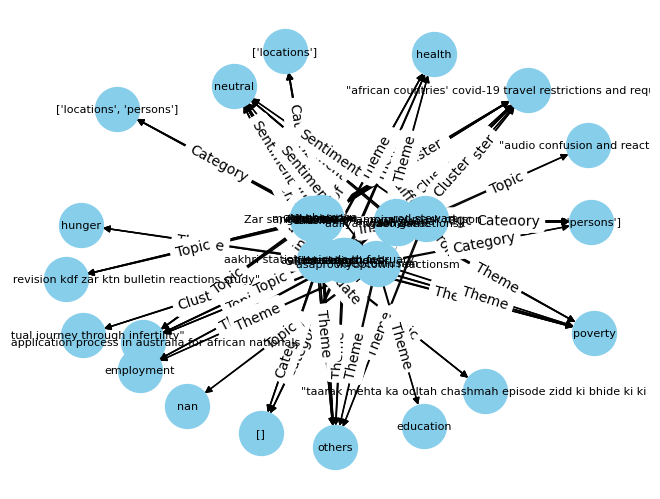

In [14]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_expanded[['topic', 'theme', 'cluster', 'Head', 'Tail','sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(theme, type='Theme')
    G.add_node(category, type='Category')
    G.add_node(cluster, type='Cluster')

    for entity in entities:
        G.add_node(entity, type='Entity')

    # Add edges from Relations
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment')
        G.add_edge(head, theme, type='Theme')
        G.add_edge(head, category, type='Category')
        G.add_edge(head, cluster, type='Cluster')
        G.add_edge(head, topic, type='Topic')

        G.add_edge(tail, sentiment, type='Sentiment')
        G.add_edge(tail, theme, type='Theme')
        G.add_edge(tail, category, type='Category')
        G.add_edge(tail, cluster, type='Cluster')
        G.add_edge(tail, topic, type='Topic')

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [15]:
df2.columns

Index(['Unnamed: 0', 'sourcetype', 'Views', 'Date', 'textid', 'alltext',
       'topic', 'cleaned_theme', 'cluster', 'theme', 'sentiment', 'Text_lemma',
       'Entities', 'Relations', 'Entity_Categories', 'Head', 'Relation_Type',
       'Tail', 'Spans', 'category'],
      dtype='object')

In [16]:
df['Date']

0                       2023-08-18
1                       2023-08-18
2                       2023-08-18
3                       2023-08-18
4                       2023-08-18
                   ...            
66857    2021-03-20 09:47:52+00:00
66858    2021-03-20 09:47:52+00:00
66859    2021-08-22 09:38:28+00:00
66860    2021-08-22 09:38:28+00:00
66861    2021-08-22 09:38:28+00:00
Name: Date, Length: 66862, dtype: object

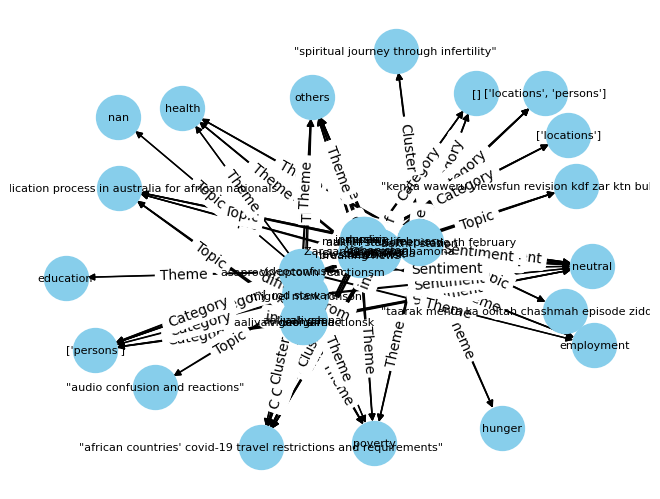

In [17]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_expanded[['topic','Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [18]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_3.gexf")


In [22]:
df.shape

(66862, 20)

In [23]:
import pandas as pd

# Define the possible themes
themes = ['poverty', 'hunger', 'health', 'employment', 'education', 'security', 'others']

# Function to expand the dataframe based on multilabels by duplicating rows
# Function to expand the dataframe based on multilabels by duplicating rows
def expand_multilabel(df, column):
    # Split the multilabel column and create a new row for each label
    df_expanded = df.copy()
    df_expanded[column] = df_expanded[column].str.split('|')  # Split the multilabel column
    df_expanded = df_expanded.explode(column)  # Duplicate rows for each label
    return df_expanded

# Apply the function to expand the Predicted_Categories3 column
df_expanded = expand_multilabel(df, 'theme')

# Display the expanded dataframe
print(df_expanded)

      Unnamed: 0 sourcetype Views                       Date textid  \
0              0    youtube   624                 2023-08-18  24969   
1              1    youtube   624                 2023-08-18  24969   
2              2    youtube   624                 2023-08-18  24969   
3              3    youtube   494                 2023-08-18  23885   
3              3    youtube   494                 2023-08-18  23885   
...          ...        ...   ...                        ...    ...   
66857      66857    twitter     2  2021-03-20 09:47:52+00:00   6728   
66858      66858    twitter     2  2021-03-20 09:47:52+00:00   6728   
66859      66859    twitter     1  2021-08-22 09:38:28+00:00   5099   
66860      66860    twitter     1  2021-08-22 09:38:28+00:00   5099   
66861      66861    twitter     1  2021-08-22 09:38:28+00:00   5099   

                                                 alltext  \
0        aaj ke mukhya samachar 13 february 2023 | aa...   
1        aaj ke mukhya sama

In [24]:
df_expanded.shape

(94574, 20)

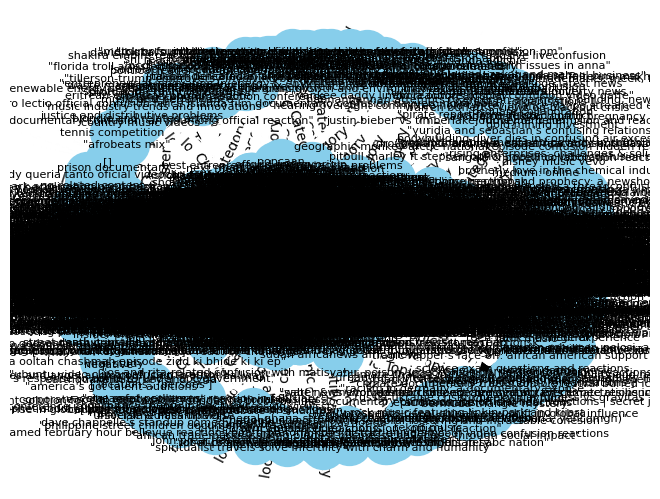

In [48]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_expanded[['topic','Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [49]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
import pandas as pd
import numpy as np

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_expanded[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a heterogeneous graph
G = nx.MultiDiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time and views information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='HasSentiment', time=time)
        G.add_edge(head, theme, type='HasTheme', time=time)
        G.add_edge(head, category, type='HasCategory', time=time)
        G.add_edge(head, cluster, type='BelongsToCluster', time=time)
        G.add_edge(head, topic, type='BelongsToTopic', time=time)

        G.add_edge(tail, sentiment, type='HasSentiment', time=time)
        G.add_edge(tail, theme, type='HasTheme', time=time)
        G.add_edge(tail, category, type='HasCategory', time=time)
        G.add_edge(tail, cluster, type='BelongsToCluster', time=time)
        G.add_edge(tail, topic, type='BelongsToTopic', time=time)

        # Add 'Views' node and edges related to entities
        views = row['Views']
        G.add_node('Views', type='Views', time=time, value=views)
        G.add_edge(entity, 'Views', type='HasViews', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Create PyTorch Geometric Data object
edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()

# Define node features and types
x = torch.eye(len(G.nodes))  # Replace with your actual features
# node_types = torch.tensor([G.nodes[node]['type'] for node in G.nodes], dtype=torch.long)
node_types = [G.nodes[node].get('type', 'Unknown') for node in G.nodes]
node_type_mapping = {t: i for i, t in enumerate(set(node_types))}
node_types = torch.tensor([node_type_mapping[t] for t in node_types], dtype=torch.long)

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y, node_types=node_types)



In [50]:
data

Data(x=[32446, 32446], edge_index=[2, 3594240], y=[32446], train_mask=[32446], test_mask=[32446], node_types=[32446])

In [51]:
import torch
from torch_geometric.utils import to_undirected, add_self_loops

# Your existing data object
data = Data(x=torch.zeros((3180, 3180)), edge_index=torch.tensor([[0, 1], [1, 0]]), y=torch.zeros(3180), train_mask=torch.zeros(3180), test_mask=torch.zeros(3180), node_types=torch.zeros(3180))

# Convert to undirected graph (assuming it's directed)
edge_index = to_undirected(data.edge_index)

# Create complete graph edge indices
complete_edge_index = torch.combinations(torch.arange(data.num_nodes), r=2).t()

# Add self-loops to the complete graph (optional)
complete_edge_index, _ = add_self_loops(complete_edge_index)

# Now, complete_edge_index contains the edge indices of a complete graph

# Update your data object
data.edge_index = complete_edge_index


In [52]:
data

Data(x=[3180, 3180], edge_index=[2, 5057790], y=[3180], train_mask=[3180], test_mask=[3180], node_types=[3180])

In [53]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
from torch_geometric.nn import HANConv
import torch.nn.functional as F
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_expanded[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a heterogeneous graph
G = nx.MultiDiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]
    time = row['Date']

    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Create PyTorch Geometric Data object
edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
x = torch.eye(len(G.nodes))  # Replace with your actual features

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class HAN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes, metadata):
        super(HAN, self).__init__()
        self.conv1 = HANConv(in_channels=num_node_features, out_channels=16, heads=8, metadata=metadata)
        self.conv2 = HANConv(in_channels=16 * 8, out_channels=num_classes, heads=1, metadata=metadata)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Convert node type to string and create metadata dictionary
metadata = {str(node_type): num_features for node_type, num_features in metadata.items()}

# Create the model
model = HAN(num_node_features=x.size(-1), num_classes=y.max().item() + 1, metadata=metadata)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()


# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

# Train the model
for epoch in range(1, 101):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')


NameError: name 'metadata' is not defined

In [ ]:
# num_nodes
# train_mask = data.train_mask.bool()
# test_mask = data.test_mask.bool()
# data
# torch version

In [54]:
# Calculate overall test accuracy
model.eval()
with torch.no_grad():
    logits = model(data.x, data.edge_index, data.node_types)
    pred = logits.argmax(dim=1)
    
    # Convert test_mask to long tensor
    test_mask = data.test_mask.long()
    
    overall_acc = (pred[test_mask] == target[test_mask]).float().mean()
    print(f'Overall Test Accuracy: {overall_acc:.4f}')

NameError: name 'model' is not defined

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch_geometric.nn import GATConv
# from torch_geometric.data import Data
# from sklearn.manifold import TSNE  # Import TSNE for dimensionality reduction
# import matplotlib.pyplot as plt

# # Visualize the embeddings
# model.eval()
# with torch.no_grad():
#     out = model(data.x, data.edge_index, data.node_types)

# # Use t-SNE for dimensionality reduction
# out_tsne = TSNE(n_components=2).fit_transform(out.numpy())

# # Scatter plot
# plt.figure(figsize=(8, 8))
# plt.scatter(out_tsne[:, 0], out_tsne[:, 1], c=data.y.numpy(), cmap='viridis')
# plt.title('Node Embeddings Visualization')
# plt.colorbar()
# plt.show()

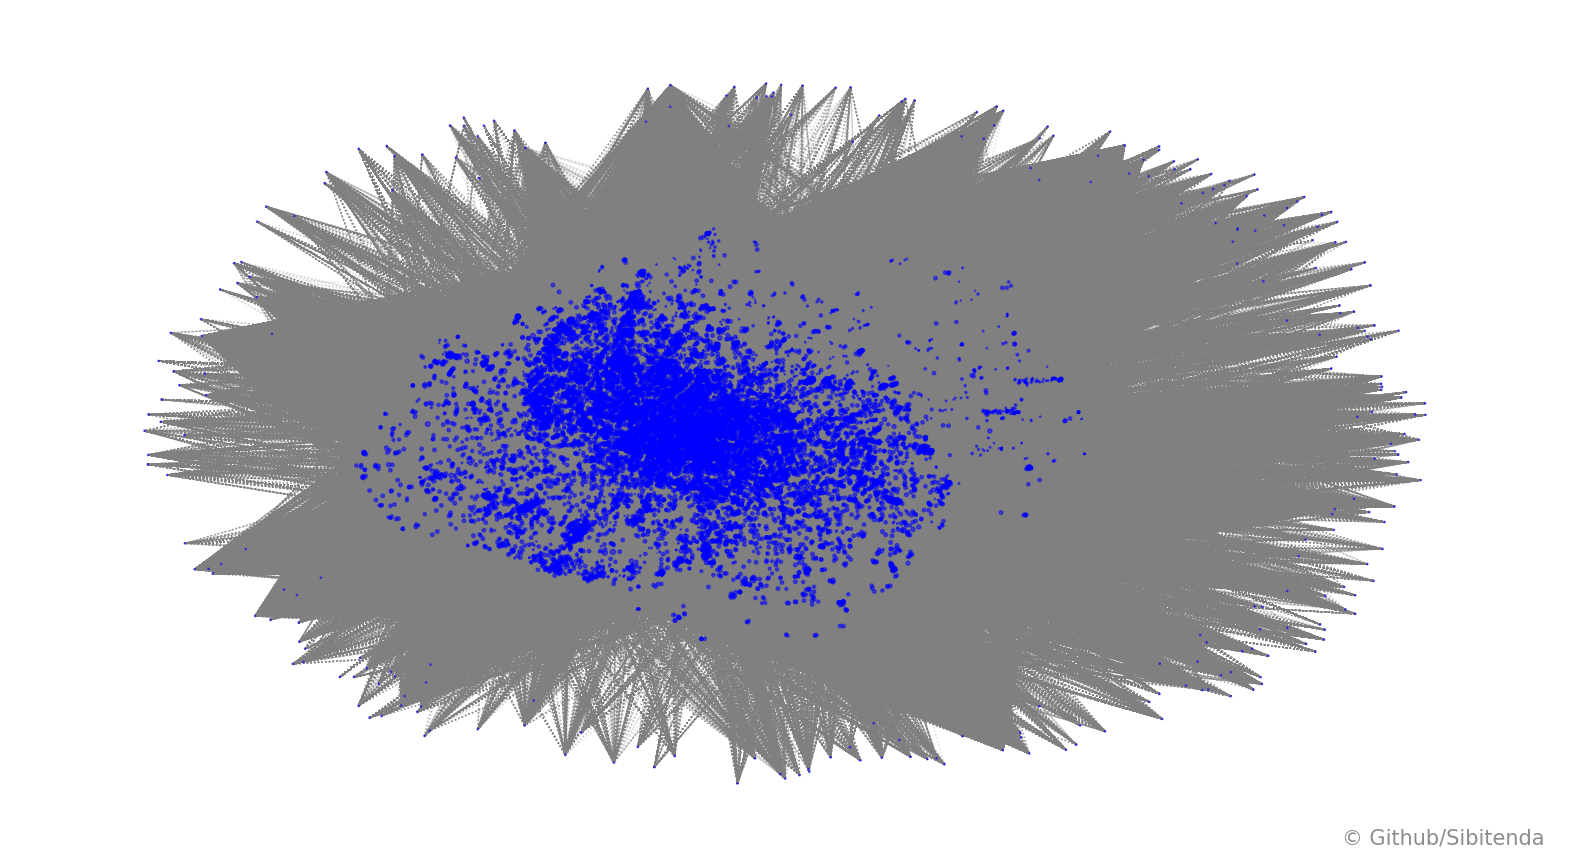

In [28]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
import pandas as pd
import numpy as np

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_expanded[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a heterogeneous graph
G = nx.MultiDiGraph()
# Create a dictionary to store 'Views' values for each node
views_dict = {}


# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time and views information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

#     for entity in entities:
#         G.add_node(entity, type='Entity', time=time, views=row['Views'])
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]


    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='HasSentiment', time=time)
        G.add_edge(head, theme, type='HasTheme', time=time)
        G.add_edge(head, category, type='HasCategory', time=time)
        G.add_edge(head, cluster, type='BelongsToCluster', time=time)
        G.add_edge(head, topic, type='BelongsToTopic', time=time)

        G.add_edge(tail, sentiment, type='HasSentiment', time=time)
        G.add_edge(tail, theme, type='HasTheme', time=time)
        G.add_edge(tail, category, type='HasCategory', time=time)
        G.add_edge(tail, cluster, type='BelongsToCluster', time=time)
        G.add_edge(tail, topic, type='BelongsToTopic', time=time)

# Save the graph in GEXF file format
nx.write_gexf(G, 'graphhetero21.gexf')

pos = nx.spring_layout(G)

# Convert node sizes to Python float
node_sizes = [float(np.log1p(sum(views_dict[node]) / len(views_dict[node]))) if node in views_dict and views_dict[node] else 1 for node in G.nodes]

# Save the graph in Gephi file format
# nx.write_gexf(G, 'graph.gephi')

# Figure
fig, ax = plt.subplots(figsize=(20, 11))

# Map "pos" attribute to nodes from pos dict
for node, position in pos.items():
    G.nodes[node]['pos'] = position

# Draw nodes
nx.draw_networkx_nodes(G=G, pos=nx.get_node_attributes(G, 'pos'), node_color='blue', alpha=0.5,
                       node_size=node_sizes)

# Draw edges
nx.draw_networkx_edges(G=G, pos=nx.get_node_attributes(G, 'pos'), edge_color='grey', style="dotted", alpha=0.1,
                       arrows=False)

ax.axis('off')

# Watermark
ax.text(0.99, 0.01, '© Github/Sibitenda',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9)

# Show the plot
plt.show()


In [58]:
# # Save the graph in GEXF file format
# nx.write_gexf(G, 'graphhero2.gexf')
# nx.write_gexf(G, 'graphhetero21.gexf')

In [56]:
from operator import itemgetter

def networkStats(G):
    """
    This function prints the basic properties of the graph and additional network statistics.
    """
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    density = nx.density(G)
    print("Network density:", density)

#     triadic_closure = nx.transitivity(G)
    simple_G = nx.Graph(G)
    triadic_closure = nx.transitivity(simple_G)

    print("Triadic closure:", triadic_closure)

    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')

    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    print("\nTop 5 nodes by degree:\n")
    for d in sorted_degree[:5]:
        print(d)

    betweenness_dict = nx.betweenness_centrality(G)  # Compute betweenness centrality
#     eigenvector_dict = nx.eigenvector_centrality(G)  # Compute eigenvector centrality
#     eigenvector_dict = nx.eigenvector_centrality(nx.Graph(G))  # Compute eigenvector centrality
    eigenvector_dict = nx.eigenvector_centrality(nx.Graph(G), max_iter=500)  # Increase max_iter to 500

    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("\nTop 5 nodes by betweenness centrality:\n")
    for b in sorted_betweenness[:5]:
        print(b)

# Assuming G is the graph you created in the previous code
networkStats(G)


Number of nodes: 32445
Number of edges: 3294720
Network density: 0.0031299423686365546
Triadic closure: 0.0009372793252269767

Top 5 nodes by degree:

('neutral', 475692)
('"african countries\' covid-19 travel restrictions and requirements"', 456080)
('[]', 370082)
('visa application process in australia for african nationals', 241848)
('others', 211154)

Top 5 nodes by betweenness centrality:

('poverty', 0.053293573673494264)
('education', 0.01831124246674583)
('health', 0.013920923444120369)
('employment', 0.013291772530939458)
('reactionsk', 0.010129530445684116)


In [57]:
from operator import itemgetter

def networkStats(G):
    """
    This function prints the basic properties of the graph and additional network statistics.
    """
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    density = nx.density(G)
    print("Network density:", density)

    simple_G = nx.Graph(G)  # Convert to a simple graph
    triadic_closure = nx.transitivity(simple_G)
    print("Triadic closure:", triadic_closure)

    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')

    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    print("\nTop 5 nodes by degree:\n")
    for d in sorted_degree[:5]:
        print(d)

    betweenness_dict = nx.betweenness_centrality(G)  # Compute betweenness centrality

    eigenvector_dict = nx.eigenvector_centrality(simple_G, max_iter=500)  # Increase max_iter to 500

    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("\nTop 5 nodes by betweenness centrality:\n")
    for b in sorted_betweenness[:5]:
        print(b)

    # Eigenvector centrality
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
    print("\nTop 5 nodes by eigenvector centrality:\n")
    for e in sorted_eigenvector[:5]:
        print(e)

# Assuming G is the graph you created in the previous code
networkStats(G)


Number of nodes: 32445
Number of edges: 3294720
Network density: 0.0031299423686365546
Triadic closure: 0.0009372793252269767

Top 5 nodes by degree:

('neutral', 475692)
('"african countries\' covid-19 travel restrictions and requirements"', 456080)
('[]', 370082)
('visa application process in australia for african nationals', 241848)
('others', 211154)

Top 5 nodes by betweenness centrality:

('poverty', 0.053293573673494264)
('education', 0.01831124246674583)
('health', 0.013920923444120369)
('employment', 0.013291772530939458)
('reactionsk', 0.010129530445684116)

Top 5 nodes by eigenvector centrality:

('"african countries\' covid-19 travel restrictions and requirements"', 0.33010814867349)
('neutral', 0.31241220550992604)
('[]', 0.2952139867074644)
('others', 0.2236460867425837)
('visa application process in australia for african nationals', 0.21805984632813483)


In [26]:
# import ast
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import dgl
# from dgl.nn import HeteroGraphConv
# from torch.utils.data import DataLoader

# # ... (your previous code)

# # Convert the graph to DGLGraph for HAN model
# G_dgl = dgl.from_networkx(G)

# # Define data loader (you need to implement this based on your data)
# # Example: DataLoader construction
# class GraphDataset(torch.utils.data.Dataset):
#     def __init__(self, graph, labels):
#         self.graph = graph
#         self.labels = labels

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         return self.graph, self.labels[idx]

# # Initialize model, loss, and optimizer
# model = HANModel(in_feats=your_input_features_size, hidden_size=64, num_heads=2, num_classes=your_num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Train the model
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     for batched_graph, labels in dataloader:
#         logits = model(batched_graph, your_node_features)
#         loss = criterion(logits, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

# # Evaluate the model
# model.eval()
# with torch.no_grad():
#     logits = model(G_dgl, your_node_features)
#     predicted_labels = torch.argmax(logits, dim=1)
#     # Evaluate the accuracy or other metrics based on your task


# Network Centrality Measures
Complex networks by definition are highly heterogeneous structures. This often results in some parts of the network being more information-rich than others. For example, in social networks, some individuals might have a large number of connections and can spread information faster than others. Hence, within the context of social network analysis, the nodes that represent them are considered more important(central). Within the context of transportation networks, an urban region where the influx of people is higher than in the other areas can be considered central. However, the centrality of a given network may change over time as a result of the growth and evolution of the underlying system. Thus, the definition of centrality is not absolute but rather depends on the specific context and the purpose of the abstraction. Taking this relativity into account, several centrality measures have been proposed that focus on different types of relationships between the nodes.

# Degree Centrality

Degree centrality is the most simple centrality measure to understand and compute. "Degree" of a node refers to the number of nodes that a given node is connected to. Within the context of city bikes, this refers to the number of bike stations that users have travelled to from the target station. As we can see in the graph below stations located in central Helsinki have a higher number of connections. Closer to the periphery of the network the degree of the nodes gradually decreases.


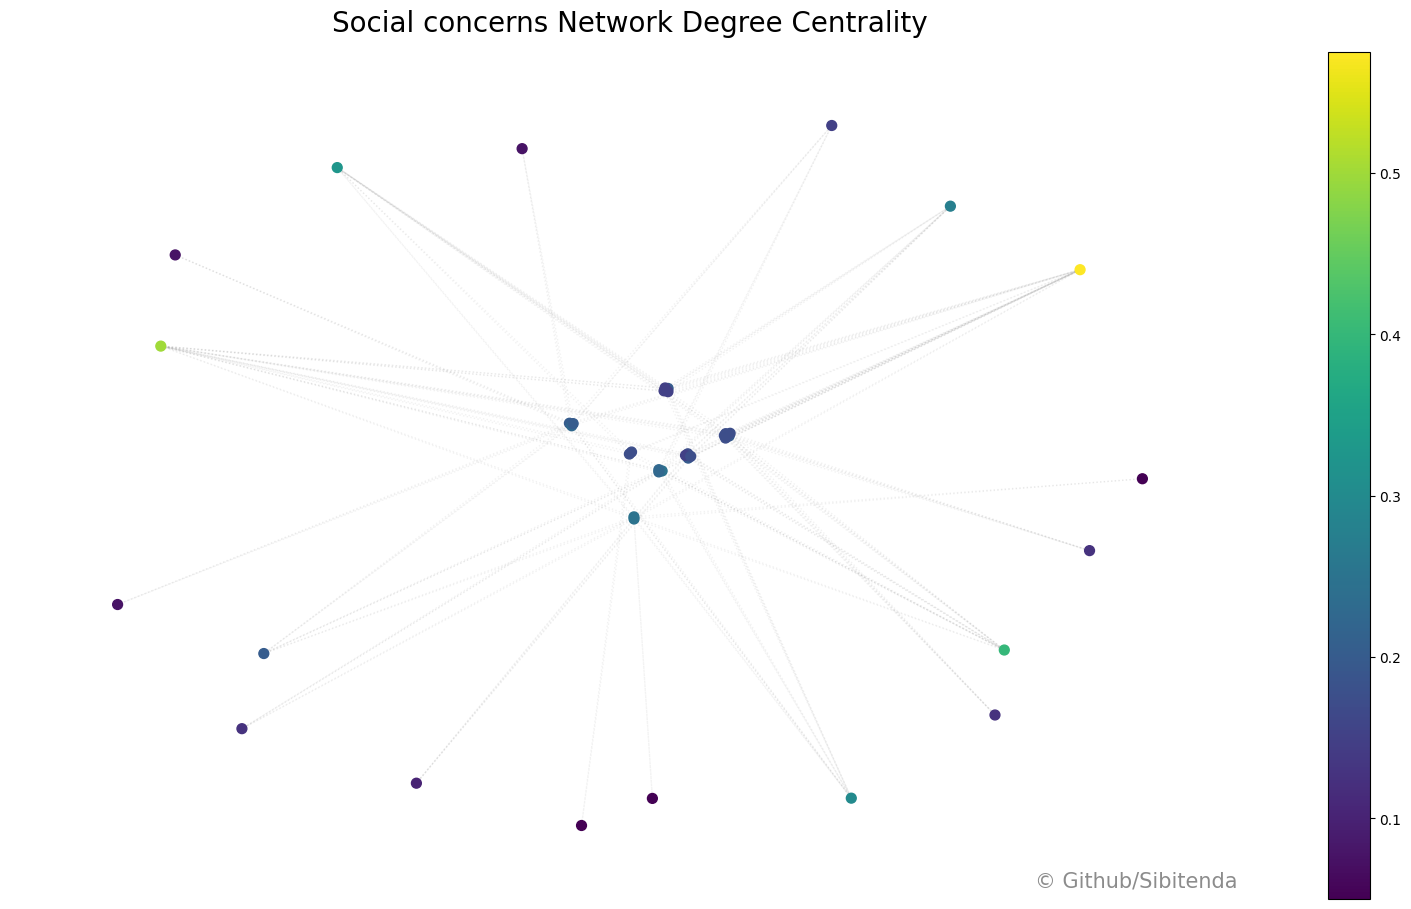

In [27]:
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt

def centralityDegree(G):
    """
    This function plots an interactive City bike network with node degrees
    """
    # Generate node positions using spring layout
    pos = nx.spring_layout(G)

    # Figure
    fig, ax = plt.subplots(figsize=(20, 11))

    degree = nx.degree_centrality(G)
    node_color = [degree[i] for i in degree.keys()]

    # Color scale
    colors = range(20)
    cmap = plt.cm.viridis
    vmin = min(node_color)
    vmax = max(node_color)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    # Draw nodes
    nodes = nx.draw_networkx_nodes(G=G, pos=pos, node_color=node_color, cmap="viridis", alpha=1, node_size=50)

    # Draw edges
    edges = nx.draw_networkx_edges(G=G, pos=pos, edge_color='grey', style="dotted", alpha=0.1, arrows=False)

    # Create colorbar
    cbar = plt.colorbar(sm, ax=ax)
    
    # Labeling Axes
    ax.set_title('Social concerns Network Degree Centrality', fontdict={"fontsize": 20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    plt.show()

# Assuming G is the graph you created
centralityDegree(G)


In [17]:
import plotly.graph_objects as go

def centralityDegreeInteractive(G):
    """
    This function plots an interactive network with colorcoded node degrees.
    """
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        opacity=0.4,
        line=dict(width=0.5, color='#888', dash='dot'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Blues',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(thickness=15,title='Node Connections',xanchor='left',titleside='right'),
            line_width=1))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append('Number of connections: '+str(len(adjacencies[1])))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    width=800,
                    height=500, 
                    title='Social concerns Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    paper_bgcolor='rgba(255,255,255,0)',
                    plot_bgcolor='rgba(255,255,255,1)',
                    annotations=[ dict(
                        text="social_concerns",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 )],
                    xaxis=dict(showgrid=True, zeroline=False, showticklabels=True),
                    yaxis=dict(showgrid=True, zeroline=False, showticklabels=True))
                    )

    fig.show()

# function call is commented for performance reasons
centralityDegreeInteractive(G)


KeyError: 'pos'

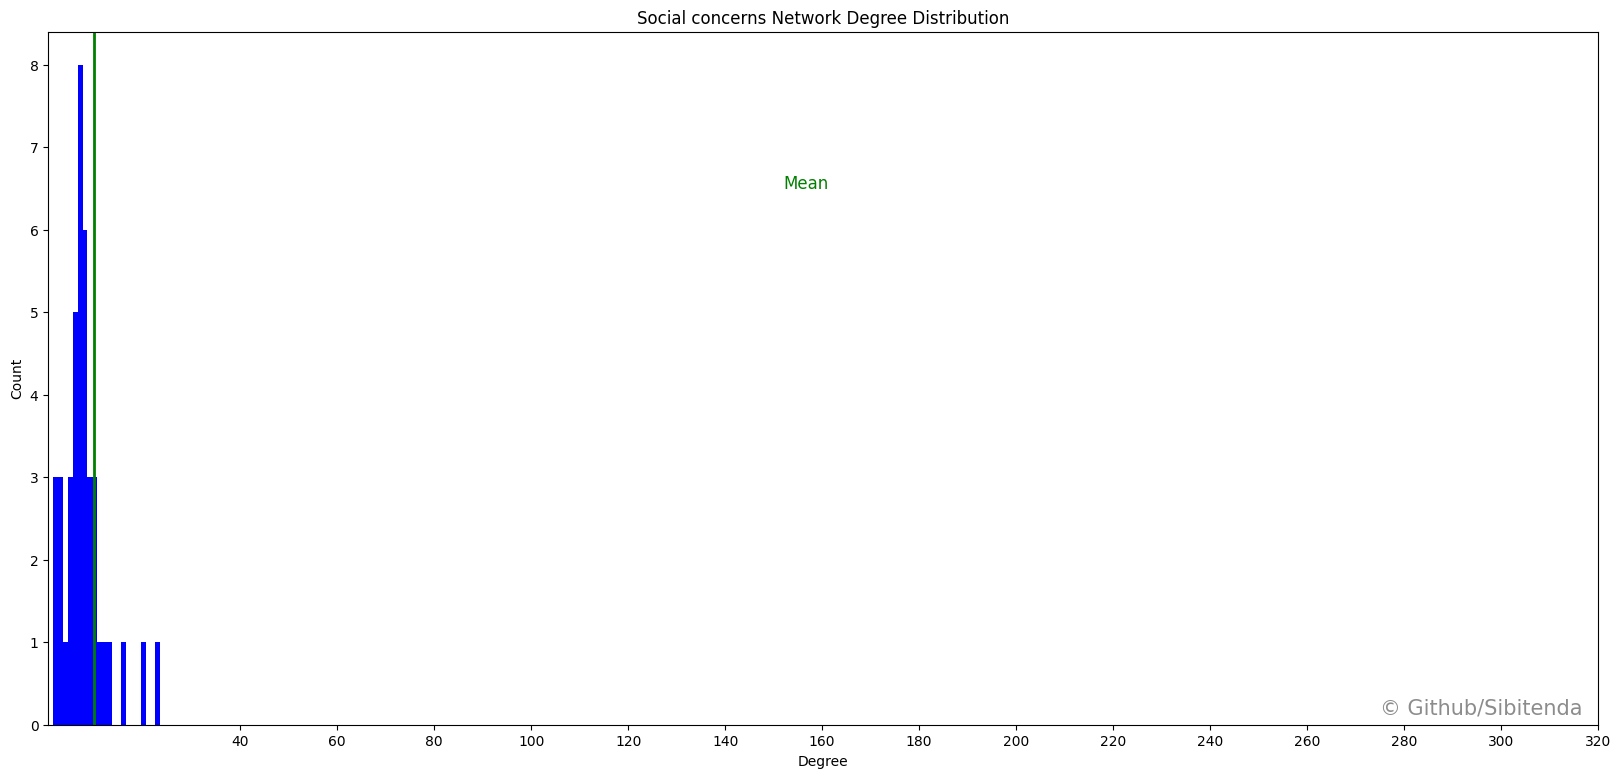

In [18]:
from collections import Counter

def centralityDegreeDist(G):
    """
    Centrality degree distribution
    """
    # Degree
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    # Figure
    fig, ax = plt.subplots(figsize=(20, 9))
    plt.bar(deg, cnt, width=1, color='blue')  # Use 'blue' or another color of your choice
    plt.axvline(x=sum(deg)/len(deg), color='green', linestyle='-', linewidth=2)  # Degree Mean

    # Labeling
    plt.title("Social concerns Network Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.text(x=152, y=6.5, s="Mean", color='green', fontsize=12)
    ax.set_xticks(range(40, 340, 20))

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    plt.show()

# function call is commented for performance reasons
centralityDegreeDist(G)


# Betweenness Centrality

The betweenness centrality captures how much a given node is "in-between" others. This measure calculates the shortest paths between all the nodes of the network and assigns each node a measure based on the number of shortest paths going through the target node. The graph below illustrates the city bike stations by betweenness centrality.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

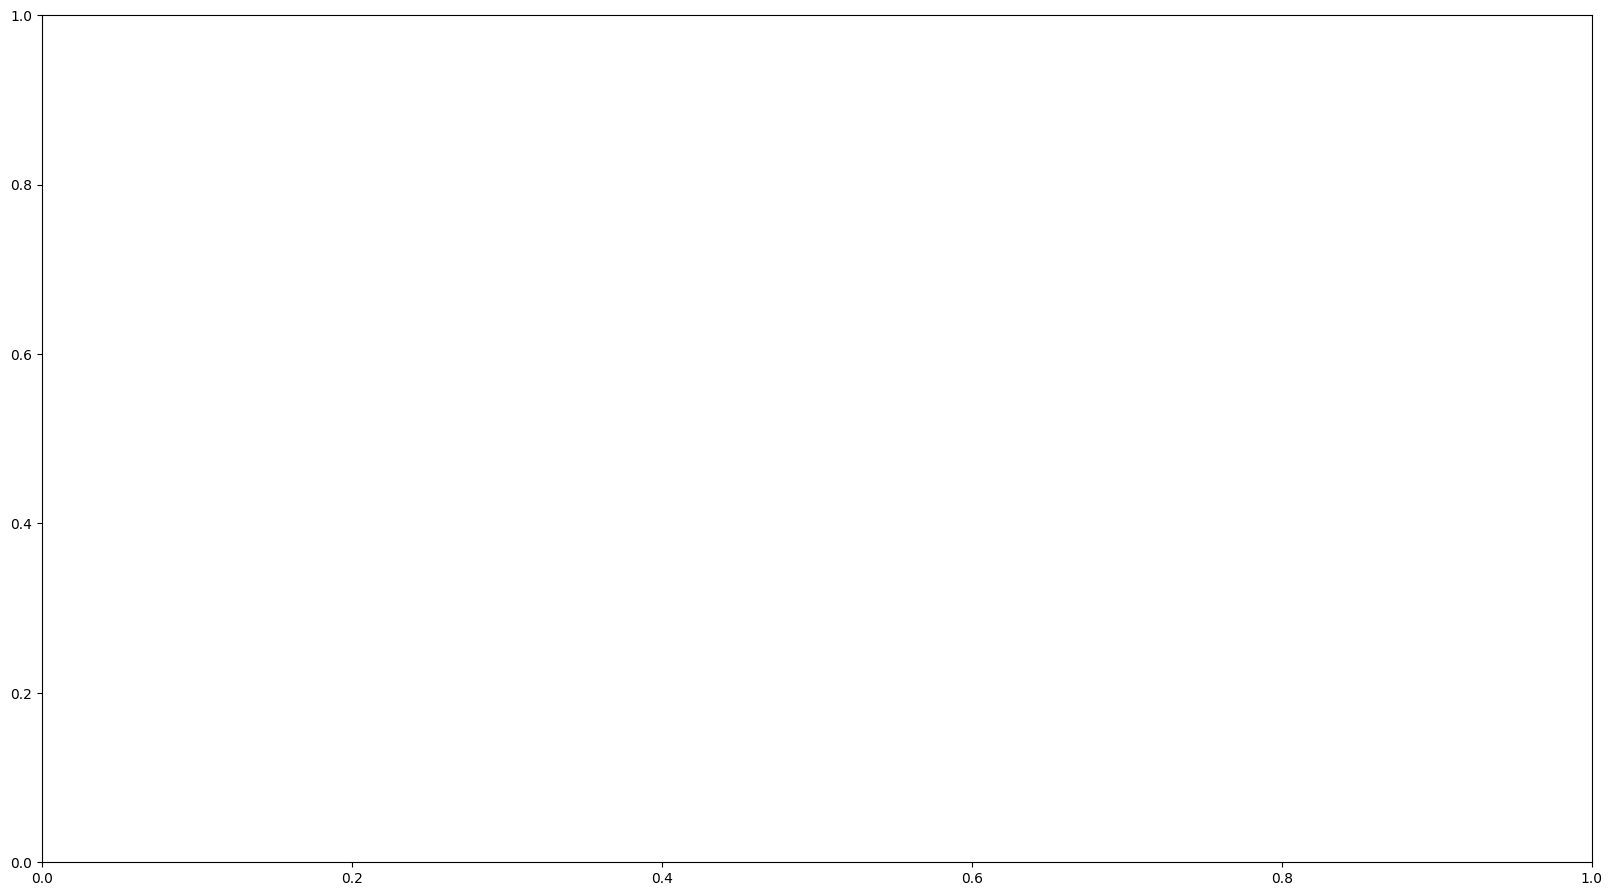

In [19]:
def centralityBetweenness(Graph): 
    """
    This function plots the concerns network betweenes centrality
    """
    
    G = Graph.copy(as_view=False)
    G.remove_node("poverty")
        
    # Figure
    fig, ax = plt.subplots(figsize=(20,11))
    
    betweenness = nx.betweenness_centrality(G)
    node_color = [betweenness[i] for i in betweenness.keys()]

    # Color scale
    colors = range(20)
    cmap = plt.cm.viridis
    vmin = min(node_color)
    vmax = max(node_color) - (sum(node_color) / len(node_color))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    # Draw
    nx.draw_networkx_nodes(G=G, pos=G.nodes.data('pos'), node_color=node_color, cmap="viridis", alpha=1, node_size=50)
    nx.draw_networkx_edges(G=G, pos=G.nodes.data('pos'), edge_color='grey', style="dotted", alpha=0.1, arrows=False)

    # Labeling Axes
    ax.set_title('social concerns about poverty Network Betweenness Centrality', fontdict={"fontsize": 20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    # Create a separate Axes for the colorbar
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
    plt.colorbar(sm, cax=cax)

    plt.show()

centralityBetweenness(G)


# Closeness Centrality
Closeness centrality is a way of detecting nodes that are able to distribute flows efficiently through the network. The closeness centrality is calculated as the normalized average of all of its geodesic distances. Within the context of the city bikes, a node with high closeness centrality will indicate stations that can potentially act as versatile intermediary stations within the network.

In [ ]:
def centralityCloseness(G):
    """
    This function plots an interactive social concerns network with node degrees
    """
    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    closeness = nx.closeness_centrality(G)
    node_color = [closeness[i] for i in closeness.keys()]

    # Color scale
    colors = range(20)
    cmap = plt.cm.viridis
    vmin = min(node_color)
    vmax = max(node_color)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    # Draw
    nx.draw_networkx_nodes(G=G, pos=G.nodes.data('pos'), node_color=node_color, cmap="viridis", alpha=1, node_size=50)
    nx.draw_networkx_edges(G=G, pos=G.nodes.data('pos'), edge_color='grey', style="dotted", alpha=0.1, arrows=False)

    # Labeling Axes
    ax.set_title('Social concerns Network Closeness Centrality', fontdict={"fontsize":20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    # Create a separate Axes for the colorbar
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
    plt.colorbar(sm, cax=cax)

    plt.show()

centralityCloseness(G)


# Eigenvector centrality & PageRank
Eigenvector centrality measures a node's importance within the network while giving consideration to the importance of its neighbours. Connections to high-scoring eigenvector centrality nodes contribute more to the score than equal connections to low-scoring nodes. In other words, a node with a large number of connections may have a low Eigenvector score if all of its connections are with low-score nodes. A popular variation of eigenvector centrality is Google's PageRank. In essence, PageRank is a variation of normalized eigenvector centrality combined with random jumps. Thus it is not surprising that Pagerank yields result comparable to Eigenvector(graphs below). With this method, stations like the Central Railway Station, Pasila, Lehtisaarentie and Haukilahdenkatu appear as central nodes within the network.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

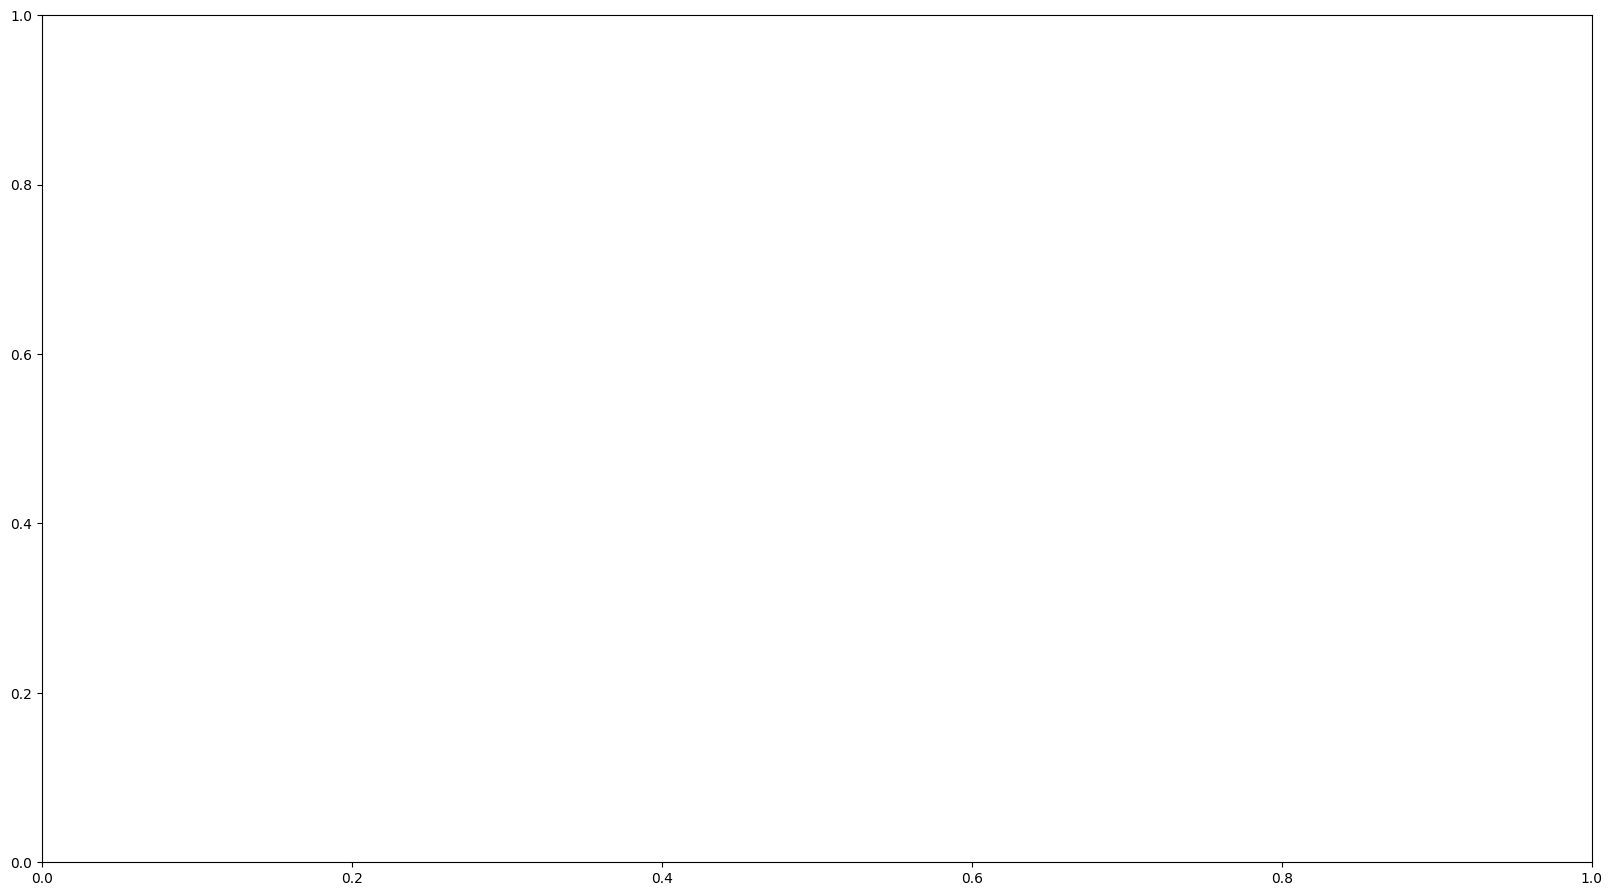

In [20]:
def centralityEigenvector(G):
    """
    This function plots the social concerns network Eigenvector centrality
    """
    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    eigenvector = nx.eigenvector_centrality(G, max_iter=6000, weight="duration")
    node_color = [eigenvector[i] for i in eigenvector.keys()]

    # Color scale
    colors=range(20)
    cmap=plt.cm.viridis
    vmin = min(node_color)
    vmax = max(node_color)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    # Draw
    nx.draw_networkx_nodes(G=G, pos=G.nodes.data('pos') ,node_color=node_color,cmap="viridis", alpha=1, node_size= 50)
    nx.draw_networkx_edges(G=G, pos=G.nodes.data('pos') ,edge_color='grey', style ="dotted", alpha=0.1, arrows=False)

    # Labeling Axes
    ax.set_title('Social concerns Network Eigenvector Centrality', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    # Create a separate Axes for the colorbar
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
    plt.colorbar(sm, cax=cax)

    plt.show()

# function call is commented for performance reasons
centralityEigenvector(G)


In [ ]:
def centralityPageRank(G):
    """
    This function plots the social concerns network PageRank centrality
    """
    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    pagerank = nx.pagerank(G, weight="duration")
    node_color = [pagerank[i] for i in pagerank.keys()]

    # Color scale
    cmap = plt.cm.viridis
    vmin = min(node_color)
    vmax = max(node_color)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    # Draw
    nx.draw_networkx_nodes(G=G, pos=G.nodes.data('pos'), node_color=node_color, cmap="viridis", alpha=1, node_size=50)
    nx.draw_networkx_edges(G=G, pos=G.nodes.data('pos'), edge_color='grey', style="dotted", alpha=0.1, arrows=False)

    # Labeling Axes
    ax.set_title('Social concerns Network PageRank Centrality', fontdict={"fontsize":20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    # Create a separate Axes for the colorbar
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
    plt.colorbar(sm, cax=cax)

    plt.show()

# Assuming G is your graph
# function call is commented for performance reasons
centralityPageRank(G)


# Community Detection
Communities in networks refer to groups of nodes that are densely connected internally. Community detection is often a crucial process for understanding the structure of complex networks. In the case of the city bike network, community detection can help to better understand bike usage patterns and determine adequate pricing models. There is a number of algorithms available for community detection.

In [ ]:
import pycombo
import matplotlib.cm as cm

def communityCombo(G):
    """
    """
    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    # Partition
    partition, modularity = pycombo.execute(G, return_modularity=True, modularity_resolution=1, weight="duration", max_communities=2, random_seed=1)

    # Partition colormap
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)

    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G, G.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, G.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Social concerns Network Communities (Combo method)', fontdict={"fontsize":20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    plt.show()

communityCombo(G)


# Louvain Method
Since the previous community detection method did not yield insightful results we can apply a different method that only focuses on the modularity of the network. The Louvain community detection algorithm is chosen due to its beautiful simplicity and the resulting ease of implementation/computation. It allows circumventing the NP-complete problem of maximum cuts in Graphs. Applying the Louvain method to the Helsinki city bike network reveals four distinct communities.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community as community_louvain

def communityLouvain(G):
    """
    This function applies the Louvain method for community detection on the social concerns network.
    """

    # Convert directed graph to undirected graph
    G_undirected = G.to_undirected()

    # Figure
    fig, ax = plt.subplots(figsize=(20, 11))

    # Compute Louvain method
    partition = community_louvain.best_partition(G_undirected, resolution=0.95, random_state=1)

    # Partition colormap
#     cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)
    # Partition colormap (using the recommended method)
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)


    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G_undirected, G_undirected.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G_undirected, G_undirected.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Social concerns Network Communities (Louvain method)', fontdict={"fontsize": 20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    plt.show()

communityLouvain(G)


# Fluid Communities Method
The Fluid Communities algorithm is a community detection algorithm based on the idea of introducing a number of fluids within a non-homogeneous environment, where fluids will expand and push each other influenced by the topology of the environment until a stable state is reached. The algorithm does the following. First, it defines each of the starting communities in a random node of the graph. Then the algorithm iterates over all nodes in a random order, updating the community of each node based on its own community and the communities of its neighbours. This process is performed iteratively until convergence.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def communityFluid(G):
    """
    This function applies the Fluid Communities method for community detection on the social concerns network.
    """

    # Convert directed graph to undirected
    G_undirected = nx.Graph(G)

    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    # Compute Fluid method
    communities = nx.algorithms.community.asyn_fluid.asyn_fluidc(G_undirected, k=5, max_iter=10000, seed=1)

    # Assigning each node to its cluster
    partition = {}
    for idx, val in enumerate(communities):
        for k in val:
            partition[k] = idx

    # Partition colormap
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)

    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G_undirected, G_undirected.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G_undirected, G_undirected.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Social concerns Network Communities (Fluid Communities method)', fontdict={"fontsize":20}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Sibitenda',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    plt.show()

# Call the function with your graph
communityFluid(G)


In [ ]:
# import ast
# import networkx as nx
# import pandas as pd
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear
# from torch_geometric.nn import GCNConv
# from torch_geometric.data import Data

# # Assuming your data is stored in a DataFrame named 'df2'
# # Extract relevant columns
# df_subset = df2[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in df_subset.iterrows():
#     topic = row['topic']
#     sentiment = row['sentiment']
#     relations = ast.literal_eval(row['Relations'])
#     category = row['category']  # Assuming category is a list
#     theme = row['theme']
#     cluster = row['cluster']
#     entities = [row['Head'], row['Tail']]  # Corrected entities extraction
#     time = row['Date']  # Assuming there is a 'time' column in your DataFrame

#     # Add nodes with time information
#     G.add_node(topic, type='Topic', time=time)
#     G.add_node(sentiment, type='Sentiment', time=time)
#     G.add_node(theme, type='Theme', time=time)
#     G.add_node(category, type='Category', time=time)
#     G.add_node(cluster, type='Cluster', time=time)

#     for entity in entities:
#         G.add_node(entity, type='Entity', time=time)

#     # Add edges from Relations with time information
#     for relation in relations:
#         head = relation['head']
#         relation_type = relation['type']
#         tail = relation['tail']
#         G.add_edge(head, tail, type=relation_type, time=time)

#         # Add additional edges for relationships between head/tail and other components
#         G.add_edge(head, sentiment, type='Sentiment', time=time)
#         G.add_edge(head, theme, type='Theme', time=time)
#         G.add_edge(head, category, type='Category', time=time)
#         G.add_edge(head, cluster, type='Cluster', time=time)
#         G.add_edge(head, topic, type='Topic', time=time)

#         G.add_edge(tail, sentiment, type='Sentiment', time=time)
#         G.add_edge(tail, theme, type='Theme', time=time)
#         G.add_edge(tail, category, type='Category', time=time)
#         G.add_edge(tail, cluster, type='Cluster', time=time)
#         G.add_edge(tail, topic, type='Topic', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Concatenate positive and negative examples along dimension 0
edge_index = torch.cat([positive_edges, negative_edges], dim=0)
y = torch.cat([torch.ones(positive_edges.size(0)), torch.zeros(negative_edges.size(1))], dtype=torch.long)

# Generate random positive and negative examples for link prediction
positive_edges = edge_index.t().contiguous()
all_possible_edges = torch.combinations(torch.arange(num_nodes), 2).t().contiguous()
# Generate negative edges
# Reshape negative_edges to match the number of columns in positive_edges
negative_edges = negative_edges[:, :positive_edges.size(1)]

# Concatenate positive and negative examples along dimension 0
edge_index = torch.cat([positive_edges, negative_edges], dim=0)
y = torch.cat([torch.ones(positive_edges.size(0)), torch.zeros(negative_edges.size(0))], dtype=torch.long)

# Shuffle the edges and labels
perm = torch.randperm(y.size(0))
edge_index = edge_index[:, perm]
y = y[perm]

# Generate random train/test split (80% train, 20% test)
train_mask = torch.randperm(y.size(0)) < 0.8
test_mask = ~train_mask

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.BCEWithLogitsLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].float().view(-1, 1))  # Compute the loss based on the training edges.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = (out > 0).float()
    correct = pred[data.test_mask] == data.y[data.test_mask].float().view(-1, 1)  # Check against ground-truth labels.
    test_acc = int(correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')


In [ ]:
import numpy as np

# Create a mapping from node labels to integers
node_mapping = {node: idx for idx, node in enumerate(G.nodes)}

# Encode positive edges
positive_edges = torch.tensor(
    [[node_mapping[edge[0]], node_mapping[edge[1]]] for edge in G.edges],
    dtype=torch.long
)

# Generate negative edges with the correct size
negative_edges = torch.randint(num_nodes, (2, positive_edges.size(0)), dtype=torch.long)

# Print sizes
print("Positive Edges Size:", positive_edges.size())
print("Negative Edges Size:", negative_edges.size())

# Concatenate positive and negative examples
edge_index = torch.cat([positive_edges, negative_edges], dim=1)
y = torch.cat([torch.ones(positive_edges.size(0)), torch.zeros(negative_edges.size(1))], dtype=torch.long)


In [ ]:
data

In [ ]:
# import ast
# import networkx as nx
# import pandas as pd
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear
# from torch_geometric.nn import GCNConv
# from torch_geometric.data import Data

# # Assuming your data is stored in a DataFrame named 'df2'
# # Extract relevant columns
# df_subset = df2[['topic', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in df_subset.iterrows():
#     topic = row['topic']
#     sentiment = row['sentiment']
#     relations = ast.literal_eval(row['Relations'])
#     category = row['category']  # Assuming category is a list
#     theme = row['theme']
#     cluster = row['cluster']
#     entities = [row['Head'], row['Tail']]  # Corrected entities extraction

#     # Add nodes
#     G.add_node(topic, type='Topic')
#     G.add_node(sentiment, type='Sentiment')
#     G.add_node(theme, type='Theme')
#     G.add_node(category, type='Category')
#     G.add_node(cluster, type='Cluster')

#     for entity in entities:
#         G.add_node(entity, type='Entity')

#     # Add edges from Relations
#     for relation in relations:
#         head = relation['head']
#         relation_type = relation['type']
#         tail = relation['tail']
#         G.add_edge(head, tail, type=relation_type)

#         # Add additional edges for relationships between head/tail and other components
#         G.add_edge(head, sentiment, type='Sentiment')
#         G.add_edge(head, theme, type='Theme')
#         G.add_edge(head, category, type='Category')
#         G.add_edge(head, cluster, type='Cluster')
#         G.add_edge(head, topic, type='Topic')

#         G.add_edge(tail, sentiment, type='Sentiment')
#         G.add_edge(tail, theme, type='Theme')
#         G.add_edge(tail, category, type='Category')
#         G.add_edge(tail, cluster, type='Cluster')
#         G.add_edge(tail, topic, type='Topic')

# # Convert to PyTorch Geometric Data
# edge_list = nx.to_pandas_edgelist(G)

# # Check data types and convert to numeric if needed
# if edge_list['source'].dtype == 'O':
#     edge_list['source'] = pd.factorize(edge_list['source'])[0]

# if edge_list['target'].dtype == 'O':
#     edge_list['target'] = pd.factorize(edge_list['target'])[0]

# # Create PyTorch Geometric Data object
# edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
# x = torch.eye(len(G.nodes))  # Replace with your actual features

# # Generate random train/test split (80% train, 20% test)
# num_nodes = len(G.nodes)
# train_mask = torch.randperm(num_nodes) < 0.8
# test_mask = ~train_mask

# # Assign labels randomly for demonstration purposes
# y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# # Create PyTorch Geometric Data object
# data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

# class GCN(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super(GCN, self).__init__()
#         torch.manual_seed(1234567)
#         self.conv1 = GCNConv(data.num_features, hidden_channels)
#         self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

#     def forward(self, x, edge_index):
#         x = self.conv1(x, edge_index)
#         x = x.relu()
#         x = F.dropout(x, p=0.5, training=self.training)
#         x = self.conv2(x, edge_index)
#         return x


# # Create the model
# model = GCN(hidden_channels=16)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()

# # Define the training and testing functions
# def train():
#     model.train()
#     optimizer.zero_grad()  # Clear gradients.
#     out = model(data.x, data.edge_index)  # Perform a single forward pass.
#     loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
#     loss.backward()  # Derive gradients.
#     optimizer.step()  # Update parameters based on gradients.
#     return loss

# def test():
#     model.eval()
#     out = model(data.x, data.edge_index)
#     pred = out.argmax(dim=1)  # Use the class with the highest probability.
#     test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
#     test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
#     return test_acc

# # Training loop
# for epoch in range(1, 101):
#     loss = train()
#     print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# # Test the model
# test_acc = test()
# print(f'Test Accuracy: {test_acc:.4f}')

# # Visualize the embeddings
# model.eval()
# out = model(data.x, data.edge_index)
# visualize(out, color=data.y)


In [ ]:
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(...)  # TODO
        self.conv2 = GATConv(...)  # TODO

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc


for epoch in range(1, 201):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Assuming you have 'train_mask', 'test_mask', 'y' as node attributes
# Adjust the following lines based on your actual data
train_mask = torch.tensor([G.nodes[node]['train_mask'] for node in G.nodes], dtype=torch.bool)
test_mask = torch.tensor([G.nodes[node]['test_mask'] for node in G.nodes], dtype=torch.bool)
y = torch.tensor([G.nodes[node]['y'] for node in G.nodes], dtype=torch.long)

# Define your PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

# Define your GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, data.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()
    
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    
    
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')   

model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

PyTorch Geometric provides an easy access to this dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Importantly, PyG does not distinguish between directed and undirected graphs, and treats undirected graphs as a special case of directed graphs in which reverse edges exist for every entry in `edge_index`.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

In [ ]:
df2

In [ ]:
import torch
from torch_geometric.data import HeteroData
from torch_geometric.utils import to_undirected

# Assuming your data is stored in a DataFrame named 'df2'
df_subset = df2[['textid', 'Date', 'topic', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Initialize HeteroData
data = HeteroData()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    date = row['Date']
    topic = row['topic']
    theme = row['theme']
    cluster = row['cluster']
    sentiment = row['sentiment']
    category = row['category']
    head = row['Head']
    tail = row['Tail']

    # Add nodes with time information
    data['date'].x = torch.tensor([date.timestamp()])  # Example feature, you should replace this with actual node features
    data['topic'].x = torch.tensor([topic])
    # Add edges with time information
    data['head_tail', (head, tail)].edge_index = torch.tensor([[textid, textid]], dtype=torch.long)  # Example edge_index, you should replace this with the actual edge_index

    # Add additional edges for relationships between head/tail and other components
    relationships = ['topic', 'theme', 'cluster', 'sentiment', 'category']
    for rel in relationships:
        data['head_tail', (head, tail), rel].edge_index = torch.tensor([[textid, textid]], dtype=torch.long)  # Example edge_index, you should replace this with the actual edge_index

# Convert the graph to PyTorch Geometric Data
data = to_undirected(data)

# Rest of your code...


In [ ]:
# import ast
# import networkx as nx
# import plotly.graph_objects as go
# import plotly.express as px
# import pandas as pd
# from datetime import timezone

# # Assuming your data is stored in a DataFrame named 'df2'
# # Extract relevant columns
# df2["Date"] = pd.to_datetime(df2["Date"])
# df_subset = df2[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in df_subset.iterrows():
#     topic = row['topic']
#     sentiment = row['sentiment']
#     relations = ast.literal_eval(row['Relations'])
#     category = row['category']  # Assuming category is a list
#     theme = row['theme']
#     cluster = row['cluster']
#     entities = [row['Head'], row['Tail']]  # Corrected entities extraction
#     time = pd.to_datetime(row['Date']).replace(tzinfo=timezone.utc)  # Assuming 'Date' is timezone-naive

#     # Add nodes with time information
#     G.add_node(topic, type='Topic', time=time)
#     G.add_node(sentiment, type='Sentiment', time=time)
#     G.add_node(theme, type='Theme', time=time)
#     G.add_node(category, type='Category', time=time)
#     G.add_node(cluster, type='Cluster', time=time)

#     for entity in entities:
#         G.add_node(entity, type='Entity', time=time)

#     # Add edges from Relations with time information
#     for relation in relations:
#         head = relation['head']
#         relation_type = relation['type']
#         tail = relation['tail']
#         G.add_edge(head, tail, type=relation_type, time=time)

#         # Add additional edges for relationships between head/tail and other components
#         G.add_edge(head, sentiment, type='Sentiment', time=time)
#         G.add_edge(head, theme, type='Theme', time=time)
#         G.add_edge(head, category, type='Category', time=time)
#         G.add_edge(head, cluster, type='Cluster', time=time)
#         G.add_edge(head, topic, type='Topic', time=time)

#         G.add_edge(tail, sentiment, type='Sentiment', time=time)
#         G.add_edge(tail, theme, type='Theme', time=time)
#         G.add_edge(tail, category, type='Category', time=time)
#         G.add_edge(tail, cluster, type='Cluster', time=time)
#         G.add_edge(tail, topic, type='Topic', time=time)

# # Create Plotly figure
# fig = px.scatter()

# # Grab unique months in the dataset
# months = [
#     i.to_timestamp("D") for i in pd.to_datetime(
#         df_subset["Date"]
#     ).dt.to_period("M").sort_values().unique()
# ]

# # Loop through months
# for i, month in enumerate(months):
#     month_str = month.strftime("%Y-%m")

#     # Duplicate original graph for a new graph in the current month
#     new_G = G.copy()

#     # Extract nodes and edges to remove
#     nodes_to_remove = [
#         node for node in new_G.nodes() 
#         if "time" in new_G.nodes[node] 
#         and new_G.nodes[node]["time"] >= month
#     ]
#     edges_to_remove = [
#         (u, v) for u, v, data in new_G.edges(data=True) 
#         if "time" in data and data["time"] >= month
#     ]

#     # Remove self-loops
#     for u, v, label in new_G.edges(data=True):
#         if u == v:
#             new_G.remove_edge(u, v)

#     # Remove nodes and edges from the new graph
#     new_G.remove_edges_from(edges_to_remove)
#     new_G.remove_nodes_from(nodes_to_remove)

#     # Plot the new graph for this month and add to the figure
#     for node, pos in nx.spring_layout(new_G).items():
#         fig.add_trace(go.Scatter(
#             x=[pos[0]],
#             y=[pos[1]],
#             mode='markers',
#             marker=dict(size=10, color='skyblue'),
#             text=[f"{node}<br>Time: {time}"],
#             name='Nodes',
#             hoverinfo='text',
#             visible=False if i > 0 else True  # Make only the first graph visible initially
#         ))

#     for edge in new_G.edges():
#         x0, y0 = nx.spring_layout(new_G)[edge[0]]
#         x1, y1 = nx.spring_layout(new_G)[edge[1]]
#         fig.add_trace(go.Scatter(
#             x=[x0, x1, None],
#             y=[y0, y1, None],
#             mode='lines',
#             line=dict(color='gray'),
#             name='Edges',
#             hoverinfo='none',
#             visible=False if i > 0 else True  # Make only the first graph visible initially
#         ))

#     # Configure slider
#     steps = []
#     for j in range(i + 1):
#         visibility = [False] * len(months) * 2   # Make all traces not visible by default
#         visibility[j * 2] = True   # Make trace for nodes visible
#         visibility[j * 2 + 1] = True    # Make trace for edges visible
#         step = dict(
#             method="update",
#             label=f"Month: {months[j].strftime('%Y-%m')}",
#             args=[{"visible": visibility}],
#         )
#         steps.append(step)

#     # Update layout for the current month
#     fig.update_layout(
#         showlegend=False,
#         hovermode='closest',
#         title=f"Time Series Graph Visualization for Month: {month_str}",
#         xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#         yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#         sliders=[
#             dict(
#                 active=0,
#                 steps=steps,
#                 pad={"t": 50}
#             ),
#         ],
#     )

# # Save the Plotly figure as an HTML file
# fig.write_html("graph_visualization.html")

# # Show the Plotly figure
# fig.show()


In [ ]:
# Save the Plotly figure as an HTML file
fig.write_html("graph_visualization.html")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import HeteroData, DataLoader
from torch_geometric.nn import HANConv, GATConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast

# Assuming df2 is already defined with the provided data

# Extract relevant columns
df_subset = df2[['textid', 'category', 'Entities', 'Relations', 'Head', 'Relation_Type', 'Tail', 'Entity_Pairs', 'sentiment', 'topic', 'theme', 'cluster']]

# Preprocess data
le_category = LabelEncoder()
le_sentiment = LabelEncoder()
le_topic = LabelEncoder()
le_theme = LabelEncoder()
le_cluster = LabelEncoder()

df_subset['category'] = le_category.fit_transform(df_subset['category'])
df_subset['sentiment'] = le_sentiment.fit_transform(df_subset['sentiment'])
df_subset['topic'] = le_topic.fit_transform(df_subset['topic'])
df_subset['theme'] = le_theme.fit_transform(df_subset['theme'])
df_subset['cluster'] = le_cluster.fit_transform(df_subset['cluster'])

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(df_subset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Create a HeteroData object
data = HeteroData()

# Add nodes with types
data['textid'].x = torch.eye(len(df_subset['textid']))
data['Entities'].x = torch.eye(len(df_subset['Entities']))
data['Head'].x = torch.eye(len(df_subset['Head']))
data['Tail'].x = torch.eye(len(df_subset['Tail']))
data['sentiment'].x = torch.eye(len(df_subset['sentiment']))
data['topic'].x = torch.eye(len(df_subset['topic']))
data['theme'].x = torch.eye(len(df_subset['theme']))
data['cluster'].x = torch.eye(len(df_subset['cluster']))

# Preprocess 'Entity_Pairs' column
df_subset['Entity_Pairs'] = df_subset['Entity_Pairs'].apply(lambda x: [pair.strip() for pair in x.split(',')])

# Add edges with types
edge_index_entities = torch.tensor(list(df_subset['Entity_Pairs'])).t().contiguous()
data.add_edge_index(edge_index_entities, 'Entities', 'Entities')

# Add additional edges
head_nodes = list(df_subset['Head'])
tail_nodes = list(df_subset['Tail'])
sentiment_nodes = list(df_subset['sentiment'])
theme_nodes = list(df_subset['theme'])
category_nodes = list(df_subset['category'])
cluster_nodes = list(df_subset['cluster'])
topic_nodes = list(df_subset['topic'])

# Add edges from head to sentiment, theme, topic, category, and cluster
for head, sentiment, theme, topic, category, cluster in zip(head_nodes, sentiment_nodes, theme_nodes, topic_nodes, category_nodes, cluster_nodes):
    data.add_edge_index(torch.tensor([(head, sentiment)]).t().contiguous(), 'Head', 'sentiment')
    data.add_edge_index(torch.tensor([(head, theme)]).t().contiguous(), 'Head', 'theme')
    data.add_edge_index(torch.tensor([(head, topic)]).t().contiguous(), 'Head', 'topic')
    data.add_edge_index(torch.tensor([(head, category)]).t().contiguous(), 'Head', 'category')
    data.add_edge_index(torch.tensor([(head, cluster)]).t().contiguous(), 'Head', 'cluster')

# Add edges from tail to sentiment, theme, topic, category, and cluster
for tail, sentiment, theme, topic, category, cluster in zip(tail_nodes, sentiment_nodes, theme_nodes, topic_nodes, category_nodes, cluster_nodes):
    data.add_edge_index(torch.tensor([(tail, sentiment)]).t().contiguous(), 'Tail', 'sentiment')
    data.add_edge_index(torch.tensor([(tail, theme)]).t().contiguous(), 'Tail', 'theme')
    data.add_edge_index(torch.tensor([(tail, topic)]).t().contiguous(), 'Tail', 'topic')
    data.add_edge_index(torch.tensor([(tail, category)]).t().contiguous(), 'Tail', 'category')
    data.add_edge_index(torch.tensor([(tail, cluster)]).t().contiguous(), 'Tail', 'cluster')

# Define the HAN model
class HAN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(HAN, self).__init__()

        # Heterogeneous Graph Convolutional layers
        self.conv1 = HANConv(in_dim, hidden_dim)
        self.conv2 = HANConv(hidden_dim, hidden_dim)

        # Classification layer
        self.classifier = nn.Linear(hidden_dim, out_dim)

    def forward(self, x, edge_indices):
        x = self.conv1(x, edge_indices)
        x = torch.relu(x)
        x = self.conv2(x, edge_indices)
        x = torch.relu(x)
        x = self.classifier(x['textid'])  # Assuming 'textid' is the target node type
        return torch.log_softmax(x, dim=-1)

# Instantiate the model
num_node_types = len(data.keys)
model = HAN(in_dim=64, hidden_dim=64, out_dim=len(le_category.classes_))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for PyTorch Geometric Data objects
train_loader = DataLoader([data[i] for i in train_data['textid']], batch_size=1, shuffle=True)
val_loader = DataLoader([data[i] for i in val_data['textid']], batch_size=1)
test_loader = DataLoader([data[i] for i in test_data['textid']], batch_size=1)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        output = model(batch, data.edge_index_dict)
        loss = criterion(output, torch.tensor([batch.y.item()]))  # Assuming 'category' is the label
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Validation
model.eval()
with torch.no_grad():
    for batch in val_loader:
        val_output = model(batch, data.edge_index_dict)
        val_loss = criterion(val_output, torch.tensor([batch.y.item()]))  # Assuming 'category' is the label

    print(f'Validation Loss: {val_loss.item()}')

# Testing
model.eval()
with torch.no_grad():
    for batch in test_loader:
        test_output = model(batch, data.edge_index_dict)
        test_loss = criterion(test_output, torch.tensor([batch.y.item()]))  # Assuming 'category' is the label

    print(f'Test Loss: {test_loss.item()}')


In [ ]:
df2['Entity_Pairs']

In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df2[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category'][0]   # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')
    G.add_node(category, type='Category')
    G.add_node(cluster, type='Cluster')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
#     G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
#     G.add_edge(theme, sentiment, type='Theme_Sentiment')
#     G.add_edge(category, sentiment, type='Category_Sentiment')

#     G.add_edge(topic, theme, type='Topics_Theme')
#     G.add_edge(topic, category, type='Topic_Category')

#     G.add_edge(theme, category, type='Theme_Category')
#     G.add_edge(theme, head, type='Theme_Head')
#     G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
#     G.add_edge(sentiment, tail, type='sentiment_Tail')
    
#     G.add_edge(category, head, type='Category_Head')
#     G.add_edge(category, tail, type='Category_Tail')
    
#     G.add_edge(cluster, head, type='Cluster_Head')
#     G.add_edge(cluster, tail, type='Cluster_Tail')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')  # Adjusted node_size
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_21.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')
    G.add_node(category, type='Category')
    G.add_node(cluster, type='Cluster')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
#     G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
#     G.add_edge(theme, sentiment, type='Theme_Sentiment')
#     G.add_edge(category, sentiment, type='Category_Sentiment')

#     G.add_edge(topic, theme, type='Topics_Theme')
#     G.add_edge(topic, category, type='Topic_Category')

#     G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    G.add_edge(cluster, head, type='Cluster_Head')
    G.add_edge(cluster, tail, type='Cluster_Tail')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')  # Adjusted node_size
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_2.gexf")


In [ ]:
df['theme'].unique()

In [ ]:

df_education = df[df['theme'] == 'education']
df_poverty = df[df['theme'] == 'poverty']
df_health = df[df['theme'] == 'health']
df_employment = df[df['theme'] == 'employment']
df_security = df[df['theme'] == 'security']
df_hunger = df[df['theme'] == 'hunger']
print(df_education.shape)


In [ ]:
df_education.columns

In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_education[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_education.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_poverty[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_poverty.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_hunger[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_hunger.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_security[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_security.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_employment[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_employment.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_health[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_health.gexf")


In [ ]:
import ast

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
#     cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
#     G.add_node(cluster, type='Cluster')
    
#     # Add nodes for each value in the 'category' list
#     for category in categories:
#         G.add_node(category, type='Category')
    
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Cluster, Category, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(head, sentiment, type='Entity_Sentiment')
    G.add_edge(tail, sentiment, type='Entity_Sentiment')
    G.add_edge(theme, sentiment, type='Theme_sentiment')
    G.add_edge(category, sentiment, type='Category_sentiment')
# #     G.add_edge(topic, cluster, type='Topic-Cluster')
#     for category in categories:
#         G.add_edge(topic, category, type='Topic-Category')
    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_category')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic-Tail')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=row['Relation_type'])

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph4.gexf")


In [ ]:
import ast

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(cluster, type='Cluster')
    
    # Add nodes for each value in the 'category' list
    for category in categories:
        G.add_node(category, type='Category')
    
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Cluster, Category, and Theme
    G.add_edge(topic, sentiment, type='Topic-Sentiment')
    G.add_edge(topic, cluster, type='Topic-Cluster')
    for category in categories:
        G.add_edge(topic, category, type='Topic-Category')
    G.add_edge(topic, theme, type='Topic-Theme')

    # Add edges between Topic and Head
    G.add_edge(topic, head, type='Topic-Head')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph3.gexf")


In [ ]:
import ast

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['Text_lemma', 'topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    text = row['Text_lemma']
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
#     G.add_node(text, type='Text')
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(cluster, type='Cluster')
    
    # Add nodes for each value in the 'category' list
    for category in categories:
        G.add_node(category, type='Category')
    
    G.add_node(theme, type='Theme')

    # Add edges between Text, Topic, Sentiment, Cluster, Category, and Theme
    G.add_edge(text, topic, type='Text-Topic')
    G.add_edge(text, sentiment, type='Topic-Sentiment')
    G.add_edge(text, cluster, type='Topic-Cluster')
    for category in categories:
        G.add_edge(text, category, type='Topic-Category')
    G.add_edge(text, theme, type='Topic-Theme')

    # Add edges between Text and Head
    G.add_edge(text, head, type='Text-Head')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph2.gexf")


In [ ]:
df.shape

In [ ]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Graph

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Entity_Pairs', 'Relations', 'category']]

# Create a directed graph
nodes = []
links = []

for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    entities = row['Entity_Pairs']
    relations = ast.literal_eval(row['Relations'])  # Convert the string to a dictionary
    cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    nodes.extend([
        {"name": topic, "symbolSize": 10, "category": "Topic"},
        {"name": sentiment, "symbolSize": 10, "category": "Sentiment"},
        {"name": cluster, "symbolSize": 10, "category": "Cluster"},
        {"name": theme, "symbolSize": 10, "category": "Theme"},
    ])

    for category in categories:
        nodes.append({"name": category, "symbolSize": 10, "category": "Category"})

    links.extend([
        {"source": topic, "target": sentiment},
        {"source": topic, "target": cluster},
        {"source": topic, "target": theme},
    ])

    for entity in entities:
        nodes.append({"name": entity, "symbolSize": 5, "category": "Entity"})
        links.append({"source": topic, "target": entity})

    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        nodes.append({"name": head, "symbolSize": 5, "category": "Relation"})
        nodes.append({"name": tail, "symbolSize": 5, "category": "Relation"})
        links.append({"source": head, "target": tail, "value": relation_type})

# Create the graph
graph = (
    Graph(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(
        "",
        nodes=nodes,
        links=links,
        layout="force",
        edge_symbol=["circle", "arrow"],
        edge_symbol_size=[4, 10],
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.3),
        emphasis_label_opts=opts.LabelOpts(
            is_show=True, color="#fff", position="inside", font_size=10
        ),

#         emphasis_edge_opts=opts.EdgeStyleOpts(
#             color="#FFA500", curve=0.3, width=2, opacity=0.7
#         ),
        emphasis_edge_opts=opts.LineStyleOpts(
            color="#FFA500", curve=0.3, width=2, opacity=0.7
        ),

    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="Interactive Graph"),
    )
)

# Save the graph as an HTML file
graph.render("interactive_graph.html")


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import pandas as pd

# Assuming 'Type' is the column containing relation labels
num_labels = len(df['Relation_Type'].unique())

# Load BERT tokenizer and model for sequence classification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels).to('cuda')  # Adjust num_labels and move the model to CUDA

# Assuming 'Type' is the column containing relation labels
df['relation_type'] = df['Relation_Type'].apply(lambda x: str(x))
num_labels = len(df['relation_type'].unique())

# Add label ids to the DataFrame
df['label_id'] = df['relation_type'].astype('category').cat.codes

# Convert 'head' and 'tail' columns to lists
df['Head'] = df['Head'].apply(lambda x: [x])
df['Tail'] = df['Tail'].apply(lambda x: [x])

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, df, max_length=64):
        self.df = df
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        inputs = tokenizer(
            self.df.iloc[idx]["Text_lemma"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        label = torch.tensor(self.df.iloc[idx]["label_id"]).long().to('cuda')  # Convert to long for CrossEntropyLoss and move to CUDA
        return {"input_ids": inputs["input_ids"].squeeze(), "attention_mask": inputs["attention_mask"].squeeze(), "label": label}

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_relation_classification",
    per_device_train_batch_size=8,
    save_total_limit=1,
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=100,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
)

# Training in chunks
chunk_size = 1000
for start in range(0, len(train_df), chunk_size):
    end = start + chunk_size
    chunk_train_df = train_df.iloc[start:end]

    # Create dataset for the current chunk
    chunk_train_dataset = CustomDataset(chunk_train_df)

    # Update trainer's train_dataset
    trainer.train_dataset = chunk_train_dataset

    # Create evaluation dataset for the current chunk
    chunk_eval_dataset = CustomDataset(test_df)  # You might need to modify this based on your requirements

    # Update trainer's eval_dataset
    trainer.eval_dataset = chunk_eval_dataset

    # Train the model on the current chunk
    trainer.train()

# Evaluate the model on the test set
results = trainer.evaluate(chunk_eval_dataset)

# Print evaluation results
print("***** Evaluation Results *****")
for key, value in results.items():
    print(f"{key}: {value}")

# Get predictions on the test set
predictions = trainer.predict(chunk_eval_dataset)

# Convert logits (numpy array) to PyTorch tensor
predicted_labels = torch.argmax(torch.from_numpy(predictions.predictions), dim=1)

# Convert tensor to list
predicted_labels = predicted_labels.tolist()
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision, recall, f1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import pandas as pd

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Assuming 'category' is the column containing labels
# Convert the 'category' column to a string representation
df['category'] = df['Entity_Categories'].apply(lambda x: str(x))
num_labels = len(df['category'].unique())

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Add label ids to the DataFrame
df['label_id'] = df['category'].astype('category').cat.codes

# Convert 'head' and 'tail' columns to lists
df['Head'] = df['Head'].apply(lambda x: [x])
df['Tail'] = df['Tail'].apply(lambda x: [x])

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, df, max_length=64):
        self.df = df
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        inputs = tokenizer(
            self.df.iloc[idx]["Text_lemma"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        label = torch.tensor(self.df.iloc[idx]["label_id"]).long()  # Convert to long for BCEWithLogitsLoss
        return {"input_ids": inputs["input_ids"].squeeze(), "attention_mask": inputs["attention_mask"].squeeze(), "label": label}

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_joint_entity_relation",
    per_device_train_batch_size=8,
    save_total_limit=1,
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=100,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
)

# Training in chunks
chunk_size = 1000
for start in range(0, len(train_df), chunk_size):
    end = start + chunk_size
    chunk_train_df = train_df.iloc[start:end]

    # Create dataset for the current chunk
    chunk_train_dataset = CustomDataset(chunk_train_df)

    # Update trainer's train_dataset
    trainer.train_dataset = chunk_train_dataset

    # Create evaluation dataset for the current chunk
    chunk_eval_dataset = CustomDataset(test_df)  # You might need to modify this based on your requirements

    # Update trainer's eval_dataset
    trainer.eval_dataset = chunk_eval_dataset

    # Train the model on the current chunk
    trainer.train()

# Evaluate the model on the test set
results = trainer.evaluate(chunk_eval_dataset)

# Print evaluation results
print("***** Evaluation Results *****")
for key, value in results.items():
    print(f"{key}: {value}")

# Get predictions on the test set
predictions = trainer.predict(chunk_eval_dataset)

# Convert logits (numpy array) to PyTorch tensor
predicted_labels = torch.argmax(torch.from_numpy(predictions.predictions), dim=1)

# Convert tensor to list
predicted_labels = predicted_labels.tolist()
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision, recall, f1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import pandas as pd

# Assuming 'Type' is the column containing relation labels
num_labels = len(df['Type'].unique())


# Load BERT tokenizer and model for sequence classification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)  # Adjust num_labels
# model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Assuming 'Type' is the column containing relation labels
df['relation_type'] = df['Type'].apply(lambda x: str(x))
num_labels = len(df['relation_type'].unique())

# Add label ids to the DataFrame
df['label_id'] = df['relation_type'].astype('category').cat.codes

# Convert 'head' and 'tail' columns to lists
df['Head'] = df['Head'].apply(lambda x: [x])
df['Tail'] = df['Tail'].apply(lambda x: [x])

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, df, max_length=64):
        self.df = df
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        inputs = tokenizer(
            self.df.iloc[idx]["Text_lemma"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        label = torch.tensor(self.df.iloc[idx]["label_id"]).long()  # Convert to long for CrossEntropyLoss
        return {"input_ids": inputs["input_ids"].squeeze(), "attention_mask": inputs["attention_mask"].squeeze(), "label": label}

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_relation_classification",
    per_device_train_batch_size=8,
    save_total_limit=1,
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=100,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
)

# Training in chunks
chunk_size = 1000
for start in range(0, len(train_df), chunk_size):
    end = start + chunk_size
    chunk_train_df = train_df.iloc[start:end]

    # Create dataset for the current chunk
    chunk_train_dataset = CustomDataset(chunk_train_df)

    # Update trainer's train_dataset
    trainer.train_dataset = chunk_train_dataset

    # Create evaluation dataset for the current chunk
    chunk_eval_dataset = CustomDataset(test_df)  # You might need to modify this based on your requirements

    # Update trainer's eval_dataset
    trainer.eval_dataset = chunk_eval_dataset

    # Train the model on the current chunk
    trainer.train()

# Evaluate the model on the test set
results = trainer.evaluate(chunk_eval_dataset)

# Print evaluation results
print("***** Evaluation Results *****")
for key, value in results.items():
    print(f"{key}: {value}")

# Get predictions on the test set
predictions = trainer.predict(chunk_eval_dataset)

# Convert logits (numpy array) to PyTorch tensor
predicted_labels = torch.argmax(torch.from_numpy(predictions.predictions), dim=1)

# Convert tensor to list
predicted_labels = predicted_labels.tolist()
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision, recall, f1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import math
import torch as cuda
import wikipedia
from newspaper import Article, ArticleException
from GoogleNews import GoogleNews
import IPython
from pyvis.network import Network
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Load model and tokenizer
# tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
# model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

device = torch.device("cuda")
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large").to(device)

def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

class KB():
    def __init__(self):
        self.entities = {}
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def merge_relations(self, r1):
        r2 = [r for r in self.relations
              if self.are_relations_equal(r1, r)][0]
        spans_to_add = [span for span in r1["meta"]["spans"]
                        if span not in r2["meta"]["spans"]]
        r2["meta"]["spans"] += spans_to_add

    def get_wikipedia_data(self, candidate_entity):
        try:
            # Replace this with your own method to get Wikipedia data
            # as this is a placeholder
            entity_data = {
                "title": candidate_entity,
                "url": f"https://en.wikipedia.org/wiki/{candidate_entity}",
                "summary": f"Summary for {candidate_entity}"
            }
            return entity_data
        except:
            return None

    def add_entity(self, e):
        self.entities[e["title"]] = {k: v for k, v in e.items() if k != "title"}

    def add_relation(self, r):
        # check on wikipedia
        candidate_entities = [r["head"], r["tail"]]
        entities = [self.get_wikipedia_data(ent) for ent in candidate_entities]

        # if one entity does not exist, stop
        if any(ent is None for ent in entities):
            return

        # manage new entities
        for e in entities:
            self.add_entity(e)

        # rename relation entities with their wikipedia titles
        r["head"] = entities[0]["title"]
        r["tail"] = entities[1]["title"]

        # manage new relation
        if not self.exists_relation(r):
            self.relations.append(r)
        else:
            self.merge_relations(r)

    def print(self):
        print("Entities:")
        for e in self.entities.items():
            print(f"  {e}")
        print("Relations:")
        for r in self.relations:
            print(f"  {r}")
            
def from_text_to_kb(text, span_length=128, verbose=False):
    # tokenize whole text
#     inputs = tokenizer([text], return_tensors="pt").to(device)
    inputs = tokenizer([text], return_tensors="pt", max_length=64, truncation=True).to(device)


    # compute span boundaries
    num_tokens = len(inputs["input_ids"][0])
    if verbose:
        print(f"Input has {num_tokens} tokens")
    num_spans = math.ceil(num_tokens / span_length)
    if verbose:
        print(f"Input has {num_spans} spans")
    overlap = math.ceil((num_spans * span_length - num_tokens) /
                        max(num_spans - 1, 1))
    spans_boundaries = []
    start = 0
    for i in range(num_spans):
        spans_boundaries.append([start + span_length * i,
                                 start + span_length * (i + 1)])
        start -= overlap
    if verbose:
        print(f"Span boundaries are {spans_boundaries}")

    # transform input with spans
    tensor_ids = [inputs["input_ids"][0][boundary[0]:boundary[1]]
                  for boundary in spans_boundaries]
    tensor_masks = [inputs["attention_mask"][0][boundary[0]:boundary[1]]
                    for boundary in spans_boundaries]
    inputs = {
        "input_ids": torch.stack(tensor_ids),
        "attention_mask": torch.stack(tensor_masks)
    }

    # generate relations
    num_return_sequences = 3
    gen_kwargs = {
        "max_length": 64,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": num_return_sequences
    }
    generated_tokens = model.generate(
        **inputs,
        **gen_kwargs,
    )

    # decode relations
    decoded_preds = tokenizer.batch_decode(generated_tokens,
                                           skip_special_tokens=False)

    # create kb
    kb = KB()
    i = 0
    for sentence_pred in decoded_preds:
        current_span_index = i // num_return_sequences
        relations = extract_relations_from_model_output(sentence_pred)
        for relation in relations:
            relation["meta"] = {
                "spans": [spans_boundaries[current_span_index]]
            }
            kb.add_relation(relation)
        i += 1

    return kb
# Split the DataFrame into chunks of 1000 records
chunk_size = 1000
num_chunks = math.ceil(len(df) / chunk_size)

for chunk_number in range(num_chunks):
    start_index = chunk_number * chunk_size
    end_index = (chunk_number + 1) * chunk_size
    current_chunk_df = df.iloc[start_index:end_index]

    result_list = []

    for text in current_chunk_df['Text_lemma']:
        # Process the text and create a KB instance
        kb = from_text_to_kb(text)

        # Extract information from the KB instance
        entities = kb.entities.items()
        relations = kb.relations

        # Append the information to the result list
        result_list.append({'Text_lemma': text, 'Entities': entities, 'Relations': relations})

    # Convert the list of dictionaries into a DataFrame
    result_df = pd.DataFrame(result_list)
    def extract_relation_info(relations):
        if not relations:
            return pd.Series({'Head': None, 'Type': None, 'Tail': None, 'Spans': None})
        relation = relations[0]  # Assuming only one relation per row
        head = relation.get('head')
        tail = relation.get('tail')
        relation_type = relation.get('type')
        spans = relation.get('meta', {}).get('spans')

        return pd.Series({'Head': head, 'Type': relation_type, 'Tail': tail, 'Spans': spans})

    # Apply the custom function to create new columns
    result_df[['Head', 'Type', 'Tail', 'Spans']] = result_df['Relations'].apply(extract_relation_info)

    # Define the function to extract entity categories
    def extract_entity_categories(text):
        # Assume you have the 'nlp' object defined somewhere in your code
        doc = nlp(str(text))  # Convert dict_items to string
        entity_categories = set()

        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                entity_categories.add('persons')
            elif ent.label_ == 'ORG':
                entity_categories.add('organisations')
            elif ent.label_ == 'GPE':
                entity_categories.add('locations')

        return list(entity_categories)

    # Create a new column 'Entity_Categories' in the DataFrame
    result_df['Entity_Categories'] = result_df['Entities'].apply(extract_entity_categories)

    # Save the results to a file (adjust the file format as needed)
    result_filename = f'results_chunk_{chunk_number + 1}.csv'
    result_df.to_csv(result_filename, index=False)

    print(f'Chunk {chunk_number + 1} processed and saved to {result_filename}')
result_df.head()
# Optional: Concatenate the saved results into a single DataFrame if needed
# combined_results_df = pd.concat([pd.read_csv(f) for f in result_filenames], ignore_index=True)

In [ ]:
def save_network_html(kb, filename="network_new.html"):
    # create network
    net = Network(directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    # nodes
    color_entity = "#00FF00"
    for e in kb.entities:
        net.add_node(e, shape="circle", color=color_entity)

    # edges
    for r in kb.relations:
        net.add_edge(r["head"], r["tail"],
                    title=r["type"], label=r["type"])

    # save network
    net.repulsion(
        node_distance=200,
        central_gravity=0.2,
        spring_length=200,
        spring_strength=0.05,
        damping=0.09
    )
    net.set_edge_smooth('dynamic')
    net.show(filename)

In [ ]:
result_df['Entities'][4]

In [ ]:
result_df['Relations'][4]

In [ ]:
df

In [ ]:
# kb

In [ ]:
# kb.relations
# kb.entities
df['Relations']=df['Relations'].tolist()
df['Entities']= df['Entities'].tolist()

In [ ]:
from pyvis.network import Network
from IPython.display import display, HTML

def show_network_html(df, filename="network2.html"):
    # create network
    net = Network(directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    # nodes
    color_entity = "#00FF00"
    for entities in df['Entities']:
        for entity in entities:
            entity_title, _ = entity
            net.add_node(entity_title, shape="circle", color=color_entity)

    # edges
    for index, row in df.iterrows():
        head = row['Head']
        tail = row['Tail']
        relation_type = row['Type']
        if not pd.isnull(head) and not pd.isnull(tail) and not pd.isnull(relation_type):
            net.add_edge(head, tail, title=relation_type, label=relation_type)

    # save network as HTML
    net.save_graph(filename)

    # display the network in the notebook
    with open(filename, 'r') as file:
        html_content = file.read()
        display(HTML(html_content))

# call the function
show_network_html(df)


In [ ]:
# final_df.to_csv('D:/senego/dataafrica/analysis/output_luke_final_new2.csv', index=False)
df3=pd.read_csv('D:/senego/dataafrica/analysis/output_luke_final_new2.csv')#, index=False)


In [ ]:
df3.columns

In [ ]:
df2=df3[['Text_lemma', 'entity_pairs', 'predictions','tokens_with_labels', 'predicted_labels']]
df2.head()

In [ ]:
df3['entity_pairs'][45]

In [ ]:
df3['tokens_with_labels'][45]

In [ ]:
df3['text_in_spans'][45]

In [ ]:
df3['predicted_labels'][28]

In [ ]:
df3['entity'][45]

In [ ]:
df3['original_word_spans'][5]

In [ ]:
df3.head(50)